Import statements

In [0]:
from __future__ import absolute_import, division, print_function

import matplotlib.pylab as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
import numpy as np
import os
from google.colab import drive

drive.mount("/content/gdrive/", force_remount=True)

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
#Log training accuracy and loss for every step in the epoch

class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses_train = []
    self.batch_acc_train = []
    
  def on_batch_end(self, batch, logs=None):
    self.batch_losses_train.append(logs['loss'])
    self.batch_acc_train.append(logs['acc'])

In [0]:
train_data_dir = 'gdrive/My Drive/Deep Learning project/images_/'

epochs = 2
batch_size = 50

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 510, 510, 32)      896       
_________________________________________________________________
activation_9 (Activation)    (None, 510, 510, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 253, 253, 32)      9248      
_________________________________________________________________
activation_10 (Activation)   (None, 253, 253, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 124, 124, 32)      9248      
__________

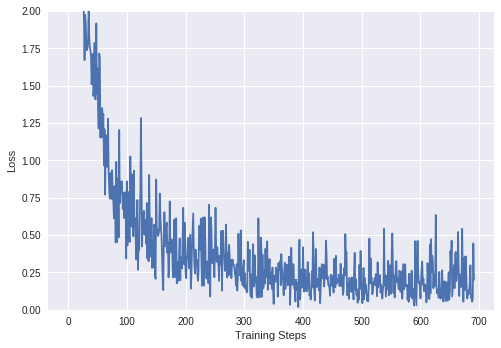

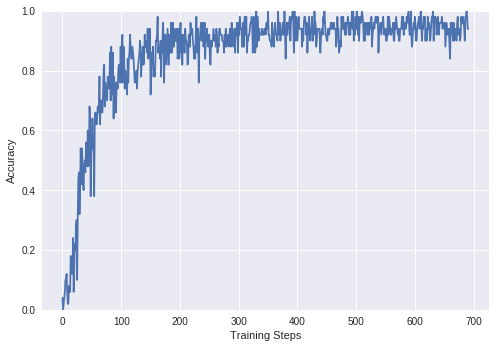

In [0]:

# dimensions of our images.
img_width, img_height = 512, 512


if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


# Define the structure of the model
    
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(),
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,validation_split=0.3)

# training set
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    subset='training')

# Validation set
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    subset='validation')

batch_stats = CollectBatchStats()

#Train the model

model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = epochs, callbacks = [batch_stats])

#Plotting the training loss and accuracy

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats.batch_losses_train)

plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats.batch_acc_train)

In [0]:
#Save model 

model.save('gdrive/My Drive/Deep Learning project/my_model_2.h5')

In [0]:
#load the address to the testing images

test_data_dir = 'gdrive/My Drive/Deep Learning project/test_images/'
#model= keras.models.load_modal('gdrive/My Drive/Deep Learning project/my_model_2.h5')

In [0]:
listt=[]

for f in os.listdir(test_data_dir):
  listt.append(f)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        shuffle = False,
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

print("folders: ",listt)

label_names = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
label_names = np.array([key.title() for key, value in label_names])
print("labels",label_names)

# Predicting the results i.e. probabilities of output labels for every input instance.

result = model.predict_generator(test_generator, steps=nb_samples )

# Extracting the label with the highest score
labels_batch = label_names[np.argmax(result, axis=-1)]
for inde in range(len(labels_batch)):
  if labels_batch[inde]=='D':
    labels_batch[inde]='/'


print(labels_batch)

Found 380 images belonging to 30 classes.
folders:  ['ao_21', 'af_4', 'ap_24', 'am_14', 'ac_-43', 'ar_43', 'an_15', 'ak_11', 'al_13', 'ax_135', 'aw_124', 'av_96', 'at_53', 'as_45', 'aj_8', 'au_85', 'ah_5', 'ae_2', 'aa_-0.75', 'ai_6', 'ag_5', 'bd_58851250', 'bc_83', 'ab_-3', 'ay_945', 'az_1260', 'aq_36', 'bb_10443', 'ba_4710', 'ad_0']
labels ['(' ')' '*' '+' '-' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '=' 'D']
['5' '4' '/' '6' '/' '(' '8' '-' '5' '*' '4' ')' '=' '1' '5' '/' '3' '+'
 '2' '-' '1' '0' '=' '1' '1' '-' '8' '*' '7' '+' '2' '=' '(' '3' '*' '6'
 '-' '9' '*' '2' ')' '/' '2' '7' '3' '=' '(' '3' '-' '2' ')' '*' '(' '4'
 '6' '/' '2' '3' ')' '=' '(' '3' '1' '-' '1' '1' ')' '/' '(' '2' '+' '3'
 ')' '=' '(' '2' '0' '-' '3' '0' ')' '/' '(' '0' '-' '2' ')' '=' '(' '2'
 '-' '4' '/' '2' ')' '*' '3' '+' '5' '=' '2' '1' '*' '2' '/' '7' '=' '('
 '9' '-' '(' '2' '-' '9' ')' ')' '/' '(' '1' '+' '1' ')' '=' '2' '+' '9'
 '=' '5' '+' '8' '=' '(' '1' '9' '-' '7' ')' '/' '4' '+' '1' '1' '=' '2'
 '*

In [0]:
# Converting the list of predictions into string of expressions and storing in a new list.

def convertToExpList(labels_batch):
  listOfExp=[]
  tempList = []
  i=0
  while i in range(len(labels_batch)):

      if(labels_batch[i] != '='):
          tempList.append(labels_batch[i])
          i+=1
      else:
          i += 1
          listOfExp.append(tempList)
          tempList =[]
  return listOfExp

Infix expression evaluation

In [0]:
# Infix expression evaluation

def precedence(op):
	if(op == '+' or op == '-'):
		return 1
	if(op == '*' or op == '/'):
		return 2
	return 0


#Function to perform arithmetic operations.
def applyOp(a, b, op):
	if(op== '+'):
		return a + b
	elif (op== '-'):
		return a - b
	elif(op== '*'):
		return a * b
	elif(op== '/'):
		return a / b


#Function that returns value of
#expression after evaluation.
def evaluate(tokens):
	i=0
	#stack to store eger values.
	values =[]

	#stack to store operators.
	ops = []

	while i in range(len(tokens)):

		#Current token is a whitespace,
		#skip it.
		if(tokens[i] == ' '):
			i += 1
			continue

		#Current token is an opening
		#brace, push it to 'ops'
		elif(tokens[i] == '('):
			ops.append(tokens[i])
			i += 1


		#Current token is a number, push
		#it to stack for numbers.
		elif(tokens[i].isdigit()):
			val = 0

			#There may be more than one
			#digits in number.
			while(i < len(tokens) and tokens[i].isdigit()):

				val = (val*10) + int(tokens[i])
				i+=1


			values.append(val)

		#Closing brace encountered, solve
		#entire brace.
		elif(tokens[i] == ')'):

			while(ops and ops[-1] != '('):

				val2 = values[-1]
				values.pop()

				val1 = values[-1]
				values.pop()

				op = ops[-1]
				ops.pop()

				values.append(applyOp(val1, val2, op))


			#pop opening brace.
			ops.pop()
			i += 1


		#Current token is an operator.
		else:

			#While top of 'ops' has same or greater
			#precedence to current token, which
			#is an operator. Apply operator on top
			#of 'ops' to top two elements in values stack.
			while(ops and precedence(ops[-1])>= precedence(tokens[i])):
				val2 = values[-1]
				values.pop()

				val1 = values[-1]
				values.pop()

				op = ops[-1]
				ops.pop()

				values.append(applyOp(val1, val2, op))


			#Push current token to 'ops'.
			ops.append(tokens[i])
			i+=1


	#Entire expression has been parsed at this
	#po, apply remaining ops to remaining
	#values.
	while(ops):
		val2 = values[-1]
		values.pop()

		val1 = values[-1]
		values.pop()

		op = ops[-1]
		ops.pop()

		values.append(applyOp(val1, val2, op))


	#Top of 'values' contains result, return it.
	return values[-1]

In [0]:
#labels_batch = ['1', '0' ,'*', '(', '4', '0' ,'+' ,'3', 'D', '2', '-' ,'7', '*' ,'4' ,')', '=','4', '0' ,'*', '(', '4', '0' ,'+' ,'3', 'D', '2', '-' ,'7', '*' ,'4' ,')', '=']

listOfExp = convertToExpList(labels_batch)
print("No of expressions: ",len(listOfExp))

No of expressions:  30


In [0]:
# Evaluating the expressions

print("\n====================================EXP EVALUATION===================================================")
actual=[-0.75,-3,-43,0,2,4,5,5,6,8,11,13,14,15,21,24,36,43,45,53,85,96,124,135,945,1260,4710,10443,83,58851250]
prediction=[]
correct=0
i=0
for exp in listOfExp:
  str1="".join(exp)
  print("\nPredicted Exp: ",str1)
  print("Actual:     ",actual[i])
  i+=1

  #parse the expressions from the list
  try:
    ans = evaluate(str1)
    print("Prediction: ",ans)
    prediction.append(ans)
  except:
    print("ERROR IN EXP")
    print("Prediction: 0")
    prediction.append(0)
    
for i in range(len(actual)):
  if actual[i]==prediction[i]:
    correct+=1


====================================EXP EVALUATION===================================================

Predicted Exp:  54/6/(8-5*4)
Actual:      -0.75
Prediction:  -0.75

Predicted Exp:  15/3+2-10
Actual:      -3
Prediction:  -3.0

Predicted Exp:  11-8*7+2
Actual:      -43
Prediction:  -43

Predicted Exp:  (3*6-9*2)/273
Actual:      0
Prediction:  0.0

Predicted Exp:  (3-2)*(46/23)
Actual:      2
Prediction:  2.0

Predicted Exp:  (31-11)/(2+3)
Actual:      4
Prediction:  4.0

Predicted Exp:  (20-30)/(0-2)
Actual:      5
Prediction:  5.0

Predicted Exp:  (2-4/2)*3+5
Actual:      5
Prediction:  5.0

Predicted Exp:  21*2/7
Actual:      6
Prediction:  6.0

Predicted Exp:  (9-(2-9))/(1+1)
Actual:      8
Prediction:  8.0

Predicted Exp:  2+9
Actual:      11
Prediction:  11

Predicted Exp:  5+8
Actual:      13
Prediction:  13

Predicted Exp:  (19-7)/4+11
Actual:      14
Prediction:  14.0

Predicted Exp:  2*5+5
Actual:      15
Prediction:  15

Predicted Exp:  (11-5)+15
Actual:      21
Predict

In [0]:
# Final testing report

print("\n===================================TESTING REPORT=====================================================")
print("Correct expression evaluation: ",correct)
print("Total count of expressions: ",len(actual))
print("Accuracy: ",correct*100/len(actual),"%")


===================================TESTING REPORT=====================================================
Correct expression evaluation:  27
Total count of expressions:  30
Accuracy:  90.0 %
